# Exploratory Data Analysis MORPH-II
In this EDA I will inspect the data within the MORPH-II dataset and document everything noteworthy.
- [1. Load Metadata](#1-load-metadata)
- [2. Sample Data](#2-sample-data)
- [3. Gender Distribution](#3-gender-distribution)
- [4. Age Distribution](#4-age-distribution)
- [5. Plotting age over Gender](#5-plotting-age-over-gender)

### 1. Load Metadata
First, I load in the metadata of the dataset that I downloaded from Kaggle.

In [ ]:
import pandas as pd
from PIL import Image

# Load splits
train_df = pd.read_csv("dataset/index/train.csv")
val_df   = pd.read_csv("dataset/index/validation.csv")
test_df  = pd.read_csv("dataset/index/test.csv")

# Add paths
train_df['filepath'] = "dataset/images/train/" + train_df['filename']
val_df['filepath']   = "dataset/images/validation/" + val_df['filename']
test_df['filepath']  = "dataset/images/test/" + test_df['filename']

# show data
train_df


,age,gender,filename,filepath
0,3,1,00013_00M19.JPG,dataset/images/train/00013_00M19.JPG
1,3,1,00013_01M19.JPG,dataset/images/train/00013_01M19.JPG
2,3,1,00013_02M19.JPG,dataset/images/train/00013_02M19.JPG
3,3,1,00022_03M19.JPG,dataset/images/train/00022_03M19.JPG
4,4,1,00022_04M20.JPG,dataset/images/train/00022_04M20.JPG
...,...,...,...,...
40007,11,0,99984_02F27.JPG,dataset/images/train/99984_02F27.JPG
40008,12,1,99990_01M28.JPG,dataset/images/train/99990_01M28.JPG
40009,12,1,99990_02M28.JPG,dataset/images/train/99990_02M28.JPG
40010,23,1,99999_02M39.JPG,dataset/images/train/99999_02M39.JPG


### 2. Sample Data
To get an idea of what the data looks like I display a few samples of the dataset. Note that the ages in the dataset are scaled, meaning age 0=16, 1=17, 2=18 and so on. To correct that, I sum the age with an offset of 16, making sure the ages are displayed correctly for the human eye.

Noteworthy to mention, the filenames of the images contain extra data which is not specified in the metadata. The format of the images are `<PERSON_ID>_<IMAGE_N><GENDER><AGE>.JPG`, this means that `00013_00M19.JPG` is the first image of a male of the age of 19 and `00013_01M19.JPG` is his second image. Since I am not focusing on age progression on a single human, this detail is redundant but still interesting to point out.

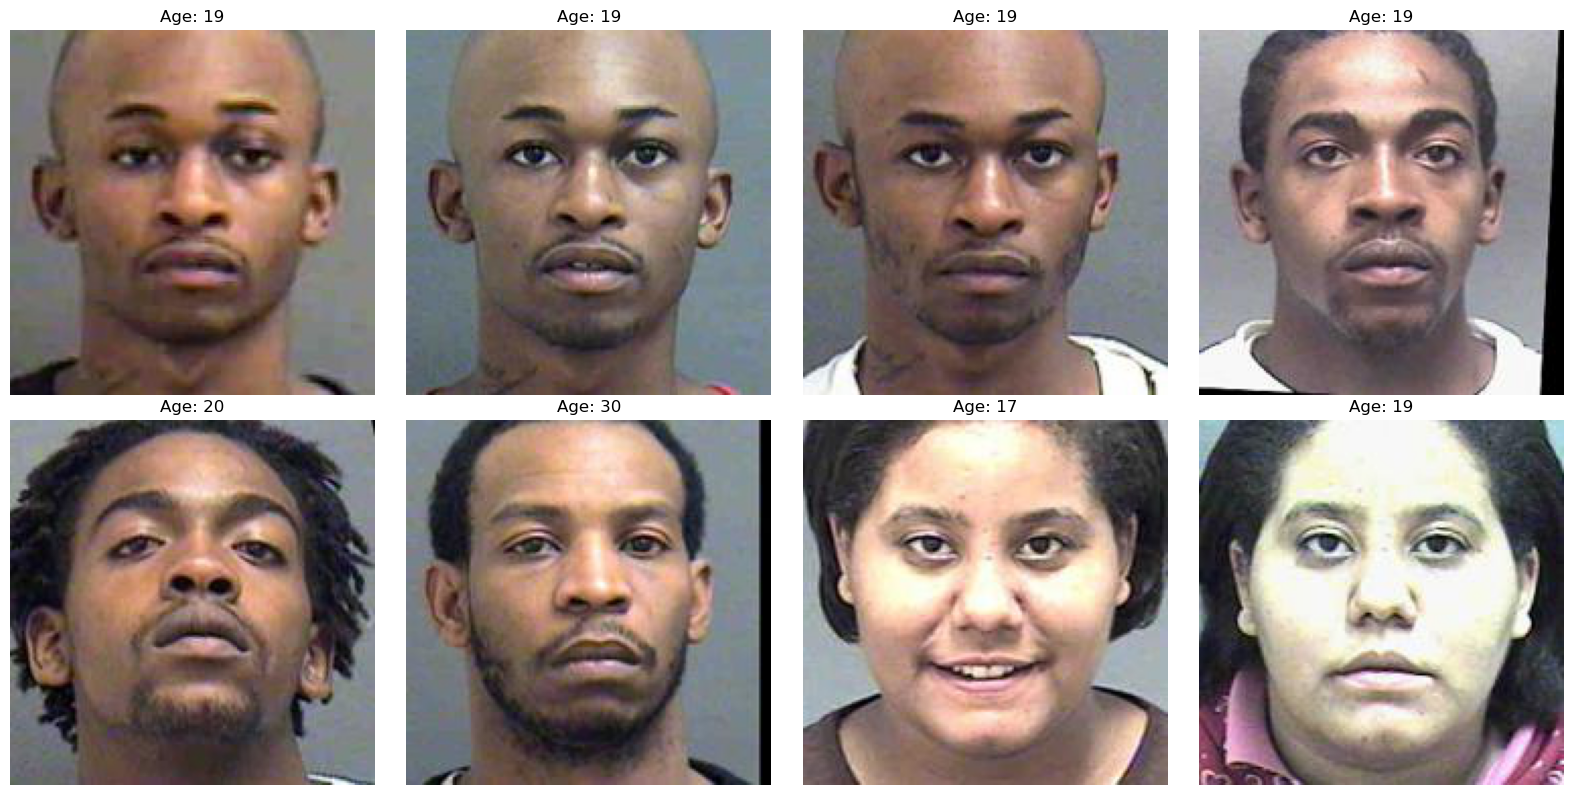

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# The age in the dataset is scaled for modelling purposes, to fix this we can sum the scaled age with the offset to correct it
age_offset = 16

# Display the first 8 images with their ages
plt.figure(figsize=(16, 8))

for i in range(8):
    img_path = train_df['filepath'].iloc[i]
    age = train_df['age'].iloc[i]  # assuming there's an 'age' column
    
    img = Image.open(img_path)
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Age: {age + age_offset}")
    plt.axis("off")

plt.tight_layout()
plt.show()


### 3. Gender Distribution
As expected, men dominate the dataset with a percentage of 86.1%, whereas women only make up for 13.9%. 

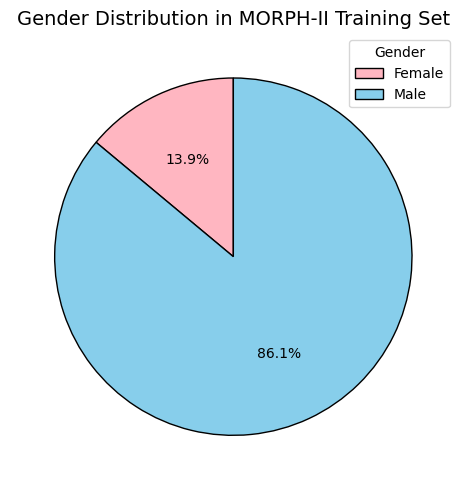

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
train_df = pd.read_csv("dataset/index/train.csv")

# Count images per gender
gender_counts = train_df['gender'].value_counts().sort_index()
gender_labels = ['Female', 'Male']  # assuming 0 = Female, 1 = Male

# Plot pie chart without labels
plt.figure(figsize=(12, 5))
colors = ['lightpink', 'skyblue']
plt.pie(
    gender_counts,
    autopct='%1.1f%%',       # show percentages
    startangle=90,           # rotate so first slice starts at 12 o'clock
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Add legend instead of labels
plt.legend(gender_labels, title="Gender", loc="upper right")

plt.title("Gender Distribution in MORPH-II Training Set", fontsize=14)
plt.tight_layout()
plt.show()


### 4. Age Distribution
Most of the images are in the range between the ages of 16 and 46, all having over 800 images. After the age of 43 there is a clear decrease in image volume. This decrease continues all the way to the age of 77.

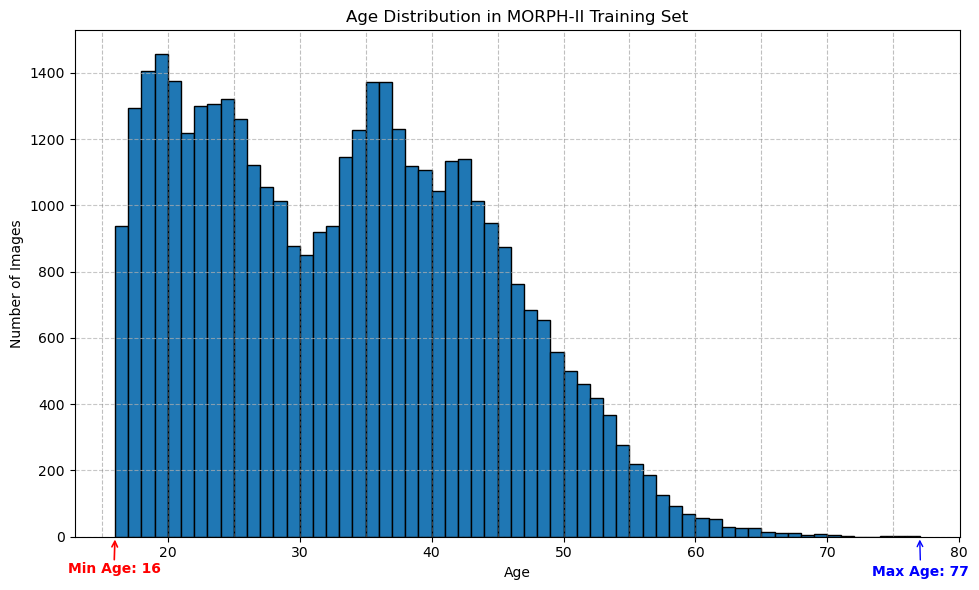

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your train.csv file
train_df = pd.read_csv("dataset/index/train.csv")

# Fix Age
correct_age = train_df['age'] + age_offset

# Plot age distribution
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(
    correct_age,
    bins=range(int(correct_age.min()), int(correct_age.max()) + 1),
    edgecolor='black'
)

plt.title("Age Distribution in MORPH-II Training Set")
plt.xlabel("Age")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical dashed lines every 5 years
for x in range(int(correct_age.min()) -1, int(correct_age.max()) + 1, 5):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

# Find min and max ages
min_age = correct_age.min()
max_age = correct_age.max()

# Annotate min age
plt.annotate(
    f"Min Age: {int(min_age)}",
    xy=(min_age, 0),                            # arrow base
    xytext=(min_age - 3.6, -120),   # text position (right & higher)
    arrowprops=dict(arrowstyle="->", color='red', lw=1.2, shrinkA=0),
    color='red',
    fontsize=10,
    fontweight='bold',
    ha='left',
    va='bottom'
)

# Annotate max age
plt.annotate(
    f"Max Age: {int(max_age)}",
    xy=(max_age, 0),
    xytext=(max_age - 3.6, -120),
    arrowprops=dict(arrowstyle="->", color='blue'),
    color='blue',
    fontsize=10,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


### 5. Plotting Age over Gender
Once we start plotting age over gender, it becomes clear how little images there are of women in this dataset. Will this result in gender bias? To find out I will create a model on this train set without implementing mitigations to see if the model will form a bias in gender. 

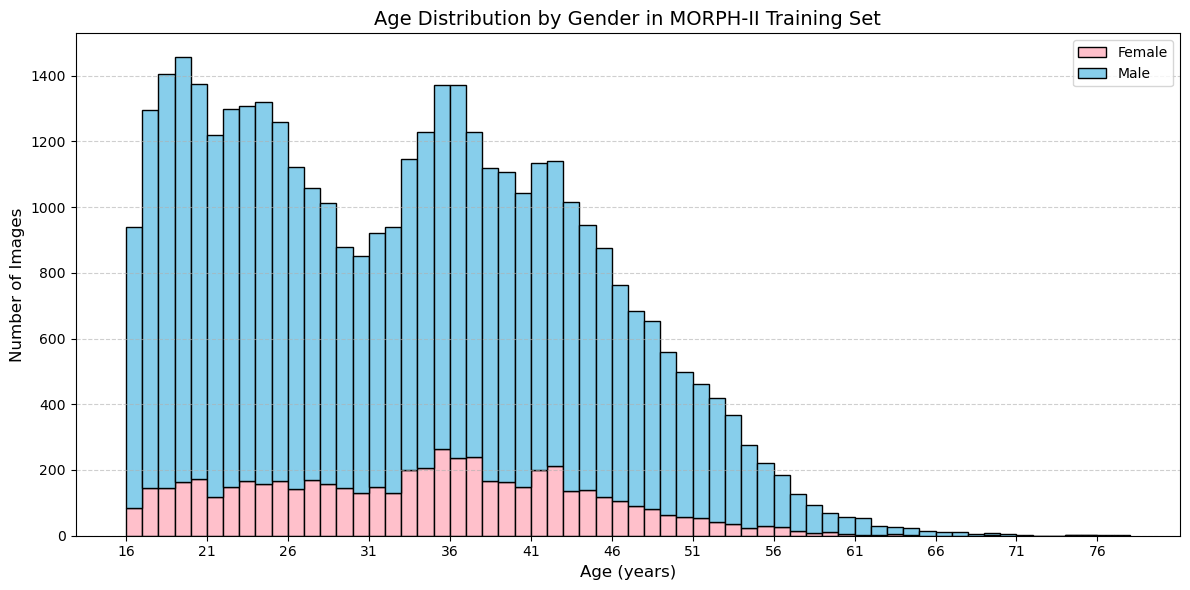

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
train_df = pd.read_csv("dataset/index/train.csv")

# Fix age if needed
correct_age = train_df['age'] + age_offset

# Separate ages by gender
male_ages = correct_age[train_df['gender'] == 1]
female_ages = correct_age[train_df['gender'] == 0]

# Define bins for each age
bins = range(int(correct_age.min()), int(correct_age.max()) + 2)  # +2 to include last age

# Plot stacked histogram
plt.figure(figsize=(12, 6))
plt.hist([female_ages, male_ages], bins=bins, stacked=True, color=['pink', 'skyblue'], edgecolor='black', label=['Female', 'Male'])

plt.title("Age Distribution by Gender in MORPH-II Training Set", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

# Optional: x-axis ticks every 5 years
plt.xticks(np.arange(correct_age.min(), correct_age.max() + 1, 5))

plt.tight_layout()
plt.show()
